# **정규분포**

---



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('walmart_cleaned.csv')

In [3]:
df_sp = df[:15000]
df_sp

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15034,2,2011-05-13,0,22.0,8196.89,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14996,15035,2,2011-05-13,0,96.0,32012.70,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14997,15036,2,2011-05-13,0,14.0,19521.67,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14998,15037,2,2011-05-13,0,80.0,23778.91,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307


## 정규분포 변환
- sklearn 패키지 중 power_transform 사용
- 정규분포 변환 위해 데이터의 왜도, 첨도를 통한 비대칭성 확인
- box-cox 변환
- yeo-johnson 변환

In [4]:
from sklearn.preprocessing import power_transform

In [5]:
df_sp = df_sp[df_sp['Weekly_Sales'] > 0]
df_sp

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,15034,2,2011-05-13,0,22.0,8196.89,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14996,15035,2,2011-05-13,0,96.0,32012.70,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14997,15036,2,2011-05-13,0,14.0,19521.67,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307
14998,15037,2,2011-05-13,0,80.0,23778.91,74.61,3.899,0.0,0.0,0.0,0.0,0.0,215.612473,7.931,3,202307


In [6]:
df_sp[['yeo-johnson']] = power_transform(df_sp[['Weekly_Sales']], standardize = False)

df_sp[['box-cox']] = power_transform(df_sp[['Weekly_Sales']], method = 'box-cox', standardize = False)

### 데이터 분포 확인

<Axes: xlabel='box-cox', ylabel='Density'>

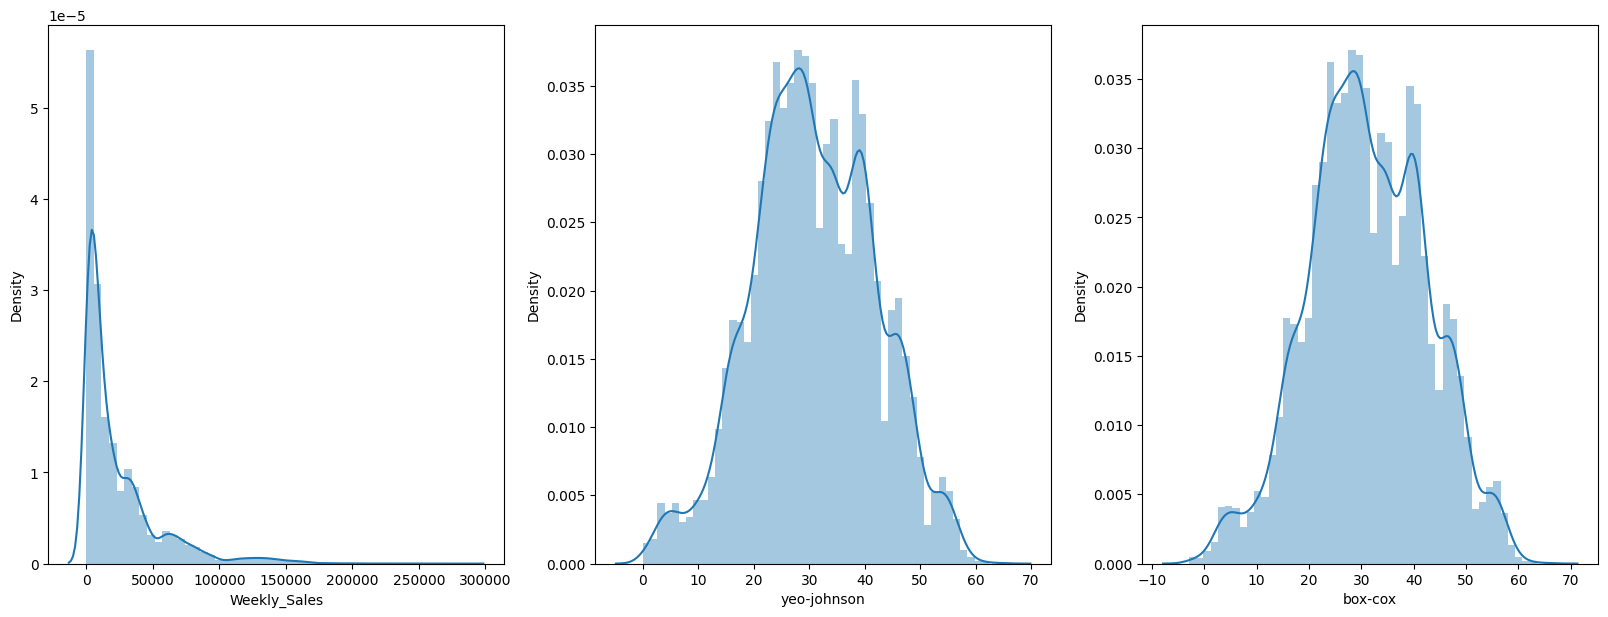

In [7]:
fig, axs = plt.subplots(ncols = 3, figsize = (20,7))
sns.distplot(df_sp['Weekly_Sales'], ax = axs[0])
sns.distplot(df_sp['yeo-johnson'], ax = axs[1])
sns.distplot(df_sp['box-cox'], ax = axs[2])



---



In [9]:
df = pd.read_csv('bike_sharing_daily.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


In [10]:
df_bs = df.dropna(subset=['casual', 'cnt'])
df_bs

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,NaN,0.437273,0.248309,120.0,1229.0,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,NaN,0.590000,0.155471,644.0,2451.0,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341
729,730,2012-12-30,1,1,12,0,0,0,1,NaN,0.231700,0.483333,0.350754,364.0,1432.0,1796


<Axes: xlabel='casual', ylabel='Density'>

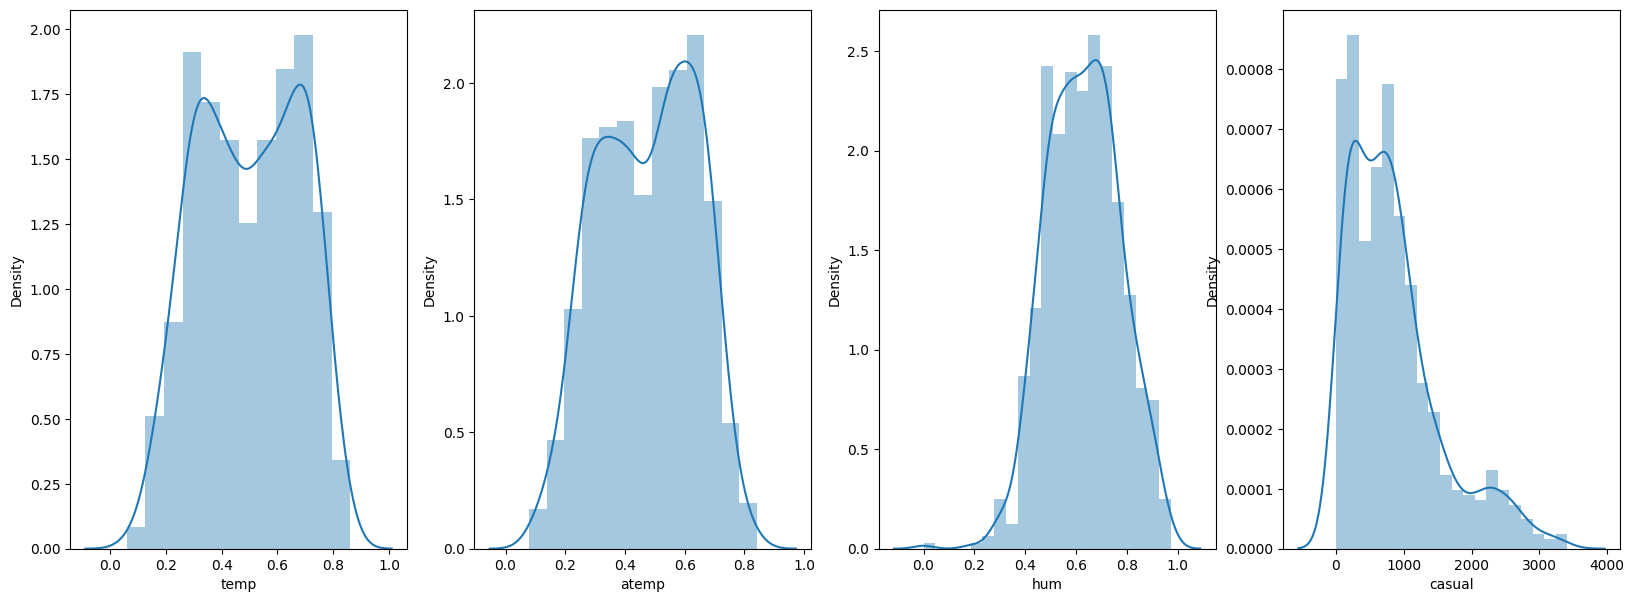

In [11]:
fig, axs = plt.subplots(ncols = 4, figsize = (20,7))
sns.distplot(df_bs['temp'], ax= axs[0])
sns.distplot(df_bs['atemp'], ax= axs[1])
sns.distplot(df_bs['hum'], ax= axs[2])
sns.distplot(df_bs['casual'], ax= axs[3])

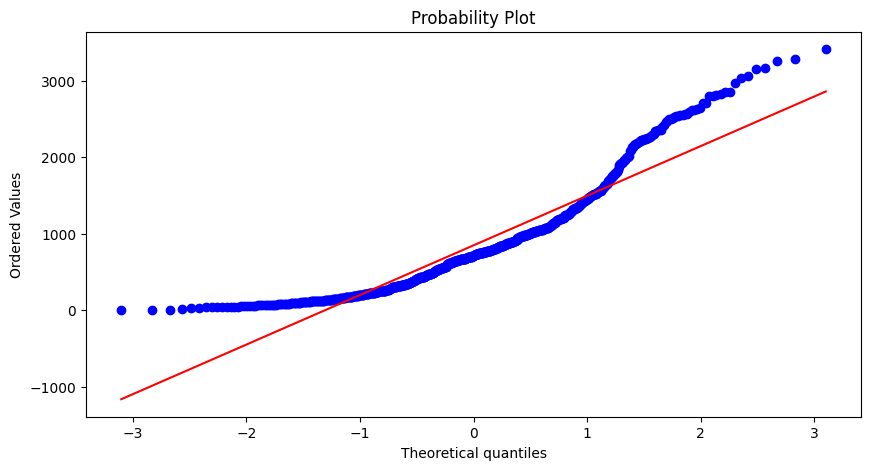

In [12]:
# 분포 확인 (정규분포로 보이지 X)

import scipy.stats as stats
plt.figure(figsize=(10,5))
stats.probplot(df_bs['casual'], dist = stats.norm, plot = plt)
plt.show()

In [13]:
# shapiro 검정

from scipy.stats import shapiro
import numpy as np

stat, p = shapiro(df_bs['casual'])
stat

0.8855783343315125

In [14]:
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Reject H0


### 정규분포 변환

In [15]:
df_bs['yeo_johnson'] = power_transform(df_bs[['cnt']], standardize = False)

df_bs['box_cox'] = power_transform(df_bs[['cnt']], method = 'box-cox', standardize = False)

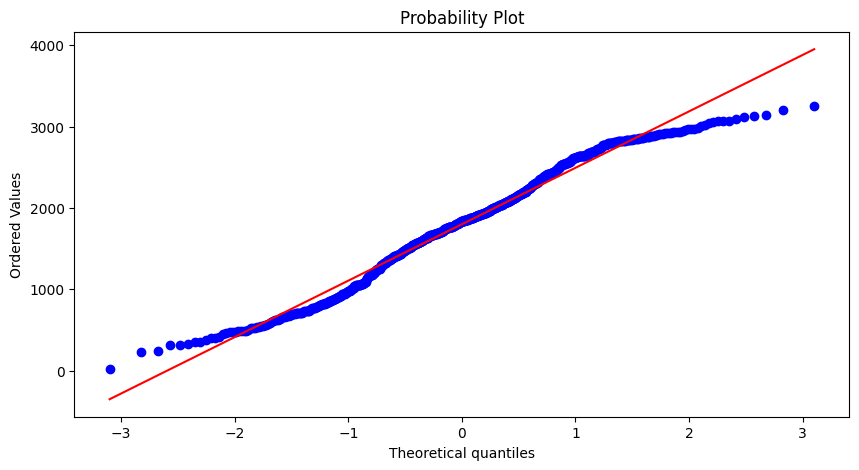

In [16]:
plt.figure(figsize=(10,5))
stats.probplot(df_bs['yeo_johnson'], dist = stats.norm, plot = plt)
plt.show()

In [17]:
stat, p = shapiro(df_bs['yeo_johnson'])

alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Reject H0


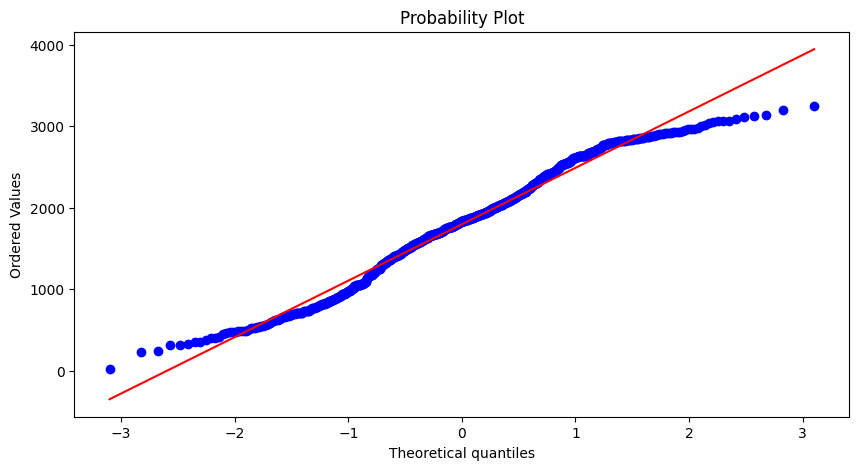

In [18]:
plt.figure(figsize=(10,5))
stats.probplot(df_bs['box_cox'], dist = stats.norm, plot = plt)
plt.show()

In [19]:
stat, p = shapiro(df_bs['box_cox'])

alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Reject H0


<Axes: xlabel='cnt', ylabel='Density'>

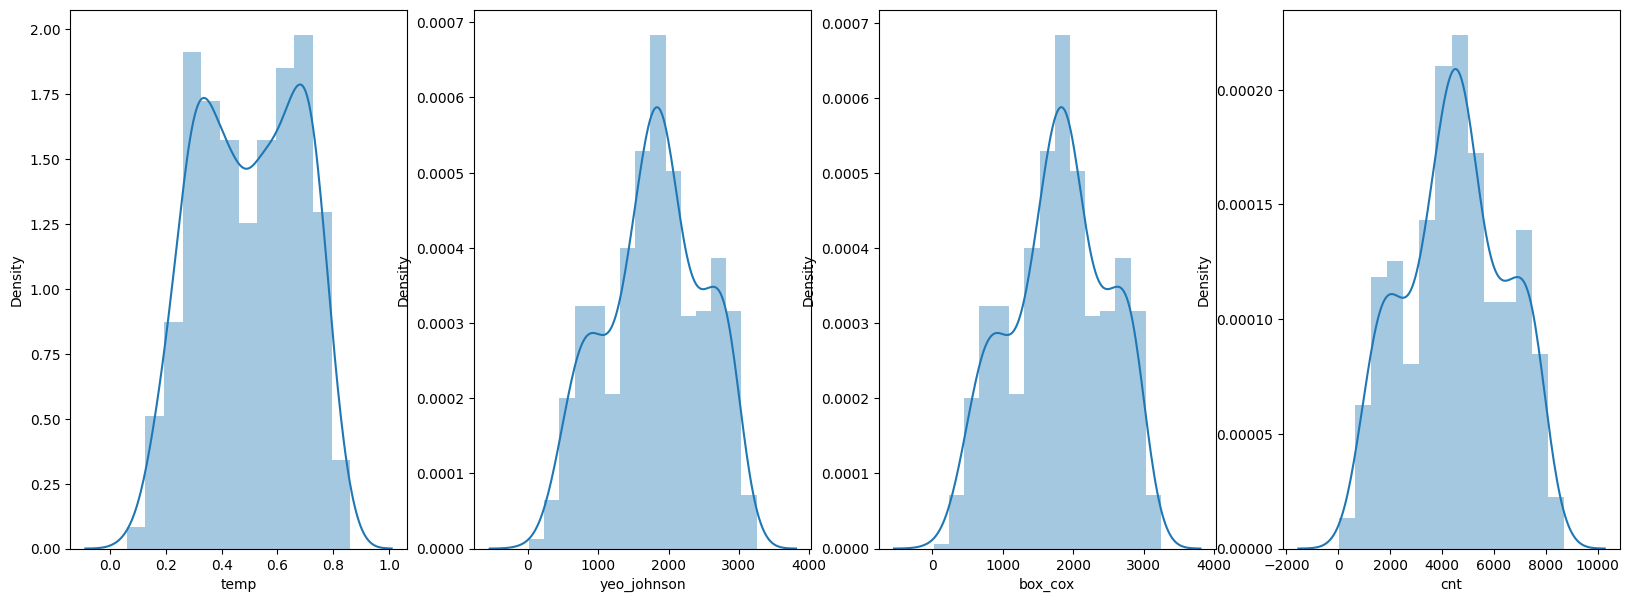

In [20]:
fig, axs = plt.subplots(ncols=4, figsize=(20,7))
sns.distplot(df_bs['temp'], ax= axs[0])
sns.distplot(df_bs['yeo_johnson'], ax= axs[1])
sns.distplot(df_bs['box_cox'], ax= axs[2])
sns.distplot(df_bs['cnt'], ax= axs[3])

## 선형회귀

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

In [22]:
df1 = df[['casual','hum','cnt']].dropna()
df1

,casual,hum,cnt
0,331.0,0.805833,985
1,131.0,0.696087,801
2,120.0,0.437273,1349
3,108.0,0.590435,1562
4,82.0,0.436957,1600
...,...,...,...
726,247.0,0.652917,2114
727,644.0,0.590000,3095
728,159.0,0.752917,1341
729,364.0,0.483333,1796


In [23]:
x = np.array(df1[['casual','hum']])
y = df1['cnt']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

1448.797251216437

In [24]:
x_c = sm.add_constant(x)
model_ols = sm.OLS(df_bs['cnt'], df_bs['casual']).fit()
summary = model_ols.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.778
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              2516.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):                   5.09e-237
Time:                        04:53:45   Log-Likelihood:                         -6597.9
No. Observations:                 720   AIC:                                  1.320e+04
Df Residuals:                     719   BIC:                                  1.320e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
casual         3.9613      0.079     50.163      0.000       3.806       4.116
==============================================================================
Omnibus:                       94.146   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.561
Skew:                          -0.979   Prob(JB):                     7.35e-29
Kurtosis:                       3.698   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df_bs1 = df_bs[['casual','cnt']]
df_bs1.corr()

,casual,cnt
casual,1.000000,0.674468
cnt,0.674468,1.000000


### 정규분포 변환 시 회귀분석

In [26]:
x = np.array(df_bs['yeo_johnson']).reshape(-1,1)
x

array([[ 480.1198657 ],
       [ 400.39132864],
       [ 632.78621267],
       [ 719.68804021],
       [ 735.0328654 ],
       [ 737.45160909],
       [ 698.61506384],
       [ 468.97338629],
       [ 409.59626949],
       [ 621.24180656],
       [ 597.23167754],
       [ 555.09185837],
       [ 656.19707427],
       [ 662.33825037],
       [ 591.0003015 ],
       [ 572.66794148],
       [ 486.53402491],
       [ 348.0884231 ],
       [ 755.15539854],
       [ 865.34174054],
       [ 711.9984573 ],
       [ 478.40740107],
       [ 480.54784811],
       [ 660.29208184],
       [ 888.15748063],
       [ 558.02655946],
       [ 232.26190596],
       [ 557.18829454],
       [ 528.15753943],
       [ 527.31278376],
       [ 694.95883116],
       [ 637.31342264],
       [ 705.10842749],
       [ 714.83280928],
       [ 778.40388152],
       [ 488.66944119],
       [ 744.29869586],
       [ 780.00360951],
       [ 706.73045671],
       [ 737.04856245],
       [ 709.97295189],
       [ 793.582

In [27]:
x = np.array(df_bs['yeo_johnson']).reshape(-1,1)
y = df_bs['cnt']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

68.569260643907

In [28]:
x_c = sm.add_constant(x)
model_ols = sm.OLS(df_bs['cnt'], df_bs['yeo_johnson']).fit()
summary = model_ols.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.633e+05
Date:                Sun, 10 Mar 2024   Prob (F-statistic):                        0.00
Time:                        04:53:57   Log-Likelihood:                         -4810.2
No. Observations:                 720   AIC:                                      9622.
Df Residuals:                     719   BIC:                                      9627.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yeo_johnson     2.5351      0.004    680.656      0.000       2.528       2.542
==============================================================================
Omnibus:                       71.839   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.832
Skew:                           0.820   Prob(JB):                     2.30e-19
Kurtosis:                       2.588   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df_bs_sp = df_bs[['casual','cnt','yeo_johnson','box_cox']]
df_bs_sp.corr()

,casual,cnt,yeo_johnson,box_cox
casual,1.000000,0.674468,0.671919,0.671914
cnt,0.674468,1.000000,0.999391,0.999389
yeo_johnson,0.671919,0.999391,1.000000,1.000000
box_cox,0.671914,0.999389,1.000000,1.000000
